<a href="https://www.kaggle.com/code/sahilr05/pizza-sales-eda?scriptVersionId=108960121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data = pd.read_excel("/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx")

In [4]:
data.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
data["order_date"] = pd.to_datetime(data["order_date"])

# Best Pizza & wrost Pizza(less order)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


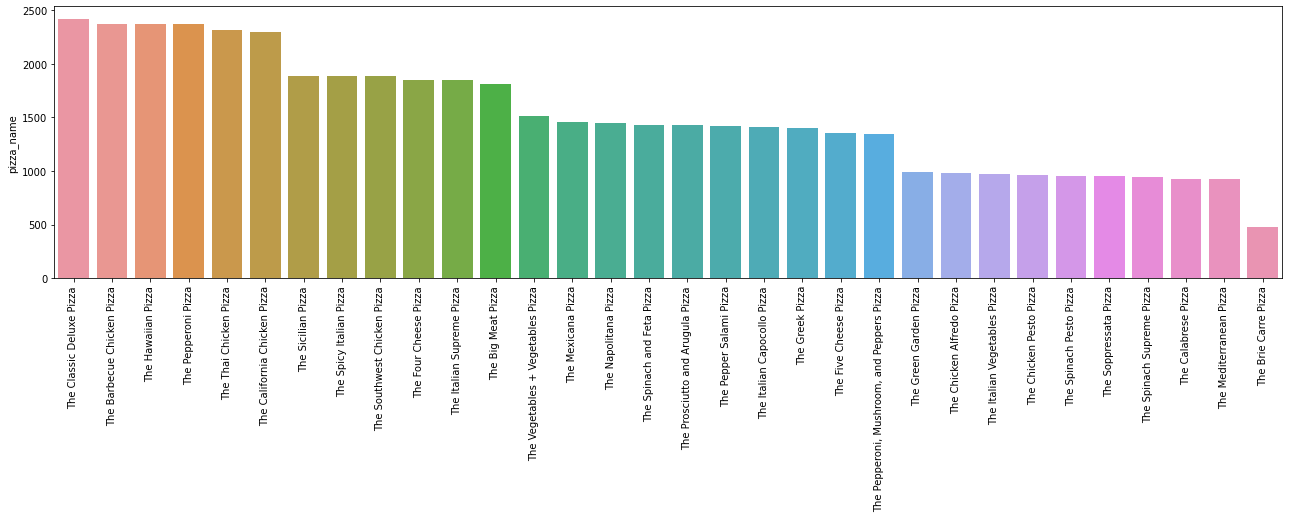

In [6]:
pizza_name = data["pizza_name"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(22,5))
sns.barplot(pizza_name.index,pizza_name)
plt.xticks(rotation=90)
plt.show()


* **The Classic Deluxe Pizza** is the best selling pizza. - **most likely pizza**
* **The Brie Carre Pizza** is sell is very low.- **not likely pizza**

In [7]:
# Number of pizza order's

data["pizza_name"].value_counts().sort_values(ascending=False)

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

In [8]:
data["quantity"].value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

- Most of people order 1 pizza

# Daily & Monthly pizza sales

In [9]:
# extract day, month & week days from order date

data["day"] = data["order_date"].dt.day
data["month"] = data["order_date"].dt.month
data["dayofweek"] = data["order_date"].dt.dayofweek  # The day of the week with Monday=0, Sunday=6.

In [10]:
# Daily sales report

pizza_day_avg =data.groupby("day")["pizza_name"].value_counts()
plt.figure(figsize=(20,5))
day_pizza = pizza_day_avg.unstack()
day_pizza

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
day,,,,,,,,,,,,,,,,,,,,,
1,94,55,11,44,75,27,32,94,59,69,...,54,70,26,78,58,38,38,51,77,53
2,90,57,16,26,93,40,33,81,46,57,...,44,61,30,57,69,28,34,45,84,42
3,73,64,15,25,83,39,30,82,47,61,...,54,56,33,55,65,39,35,62,75,63
4,94,55,26,29,77,40,41,87,48,65,...,45,50,34,69,68,33,36,52,83,51
5,66,44,16,21,72,28,17,71,36,64,...,38,54,27,63,56,31,32,40,76,43
6,80,69,15,30,84,46,29,83,51,60,...,51,68,33,62,63,34,28,51,68,53
7,75,76,19,35,78,37,37,71,55,52,...,69,59,36,73,74,29,27,55,69,45
8,75,65,11,29,74,37,31,75,45,66,...,56,55,29,63,81,32,31,50,94,36
9,81,64,15,22,82,35,28,73,46,64,...,61,67,37,75,54,26,32,41,81,47


<Figure size 1440x360 with 0 Axes>

<AxesSubplot:title={'center':'pizza sales on the date'}>

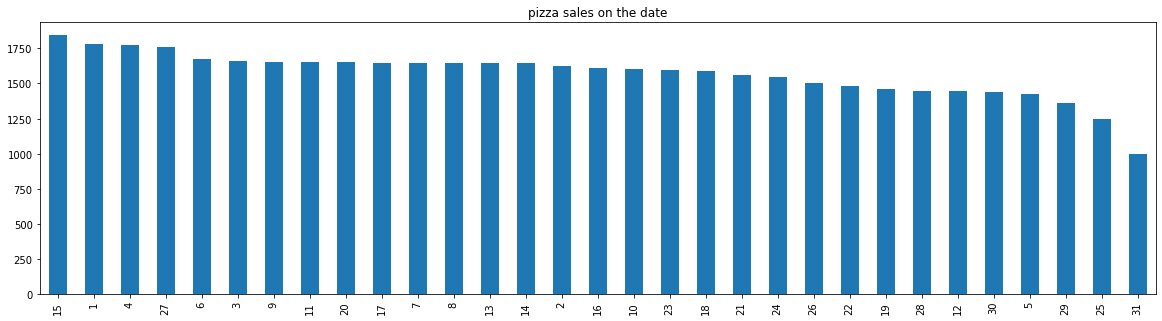

In [11]:
# Sales Data based on date

day_sales = data["day"].value_counts().sort_values(ascending=False)
day_sales.plot(kind="bar",title="pizza sales on the date",figsize=(20,5))

- As per the above analysis, the order **growth** on the **15th and 1st dates** & order **decreased** on the month's last day
- In month start sales is increasing & sales decrease on the month's end
- Highest selling in the **middle of the month**

# Which day orders are increased or decreased?

<AxesSubplot:title={'center':'Pizza Sale in day'}, xlabel='pizza_name'>

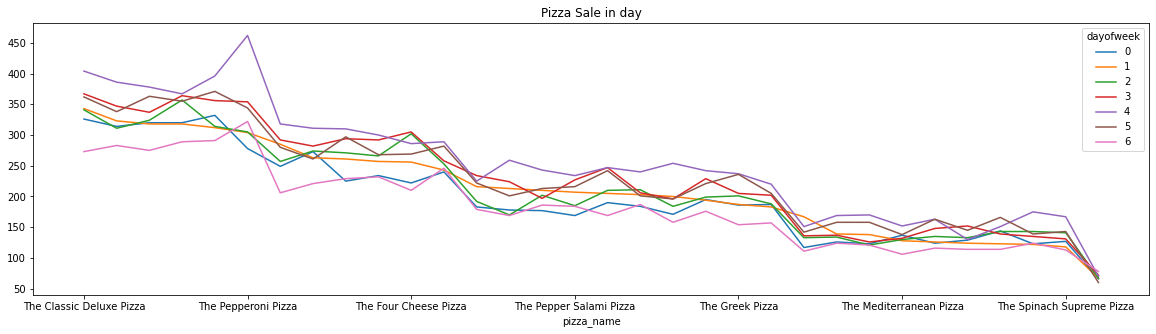

In [12]:
# order in a day
# The day of the week with Monday=0, Sunday=6.

mon_pizza = data.groupby("dayofweek")["pizza_name"].value_counts().unstack()
mon_pizza.T.sort_values(1,ascending=False).plot(figsize=(20,5),title="Pizza Sale in day")

- As per the above chart analysis, the **4th day** of the week **order is increased** (Friday)
- order decreased on sunday
- **Every day** The Classic Deluxe Pizza demand is high

# Average Order in month

In [13]:
data["month"].value_counts().median()

4080.5

- **Average orders in month is 4080**

In [14]:
data["total_price"].mean()

16.821473673385437

<AxesSubplot:xlabel='pizza_category'>

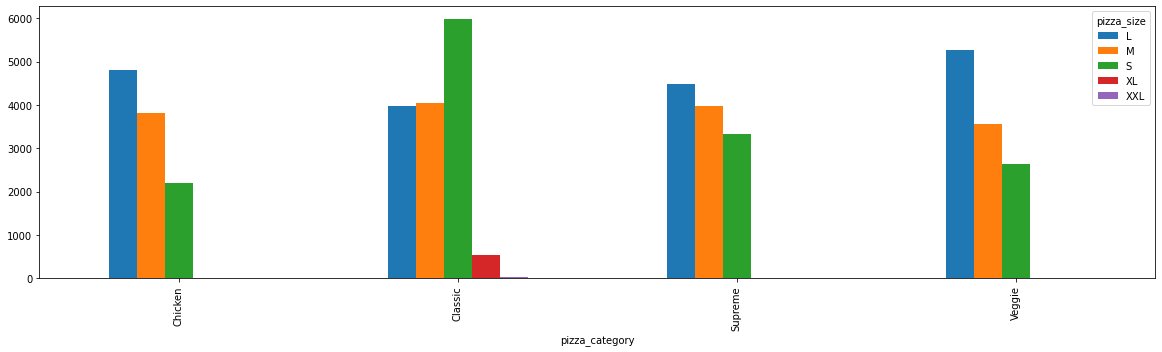

In [15]:
# Pizza sales by category

data.groupby("pizza_category")["pizza_size"].value_counts().unstack().plot(kind="bar",figsize=(20,5))

- The given bar chart illustrates the information of pizza category ON five different types of pizza size such as ( L,M,S,XL,XXL ) in one particular year. 
- In classic pizza category the highest number of pizza consumed in small size while only few amount of pizza eated in XL size.
- Chicken,classic and supreame category were eat aproximately similar amount of fast food in midium size.

# Total revenue by pizza category

In [16]:
data.groupby("pizza_category")["total_price"].sum().to_frame()

,total_price
pizza_category,
Chicken,195919.50
Classic,220053.10
Supreme,208197.00
Veggie,193690.45


Text(0.5, 1.0, 'The pizzz price depaned on there category')

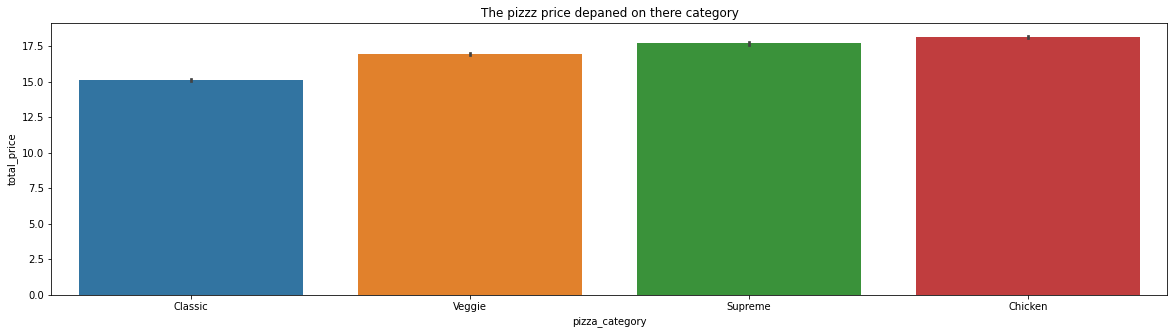

In [17]:
plt.figure(figsize=(20,5))
sns.barplot(data=data,x="pizza_category",y="total_price")
plt.title("The pizzz price depaned on there category")

- Chicken pizze is expensive
- Classic Pizza is cheaper

# Total revenue by pizza size

In [18]:
data.groupby("pizza_size")["total_price"].sum().to_frame()

,total_price
pizza_size,
L,375318.70
M,249382.25
S,178076.50
XL,14076.00
XXL,1006.60


Text(0.5, 1.0, 'Pizza sales by pizza size')

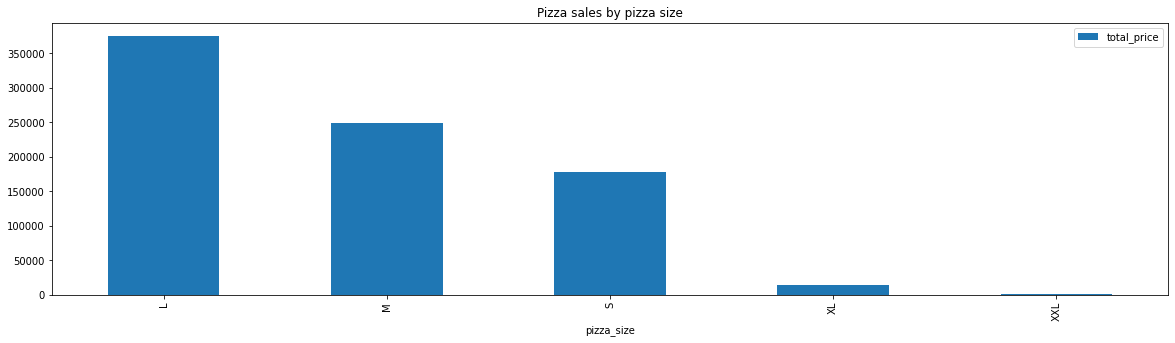

In [19]:
data.groupby("pizza_size")["total_price"].sum().to_frame().plot(kind="bar",figsize=(20,5))
plt.title("Pizza sales by pizza size")

Text(0.5, 1.0, 'Pizza Size by price')

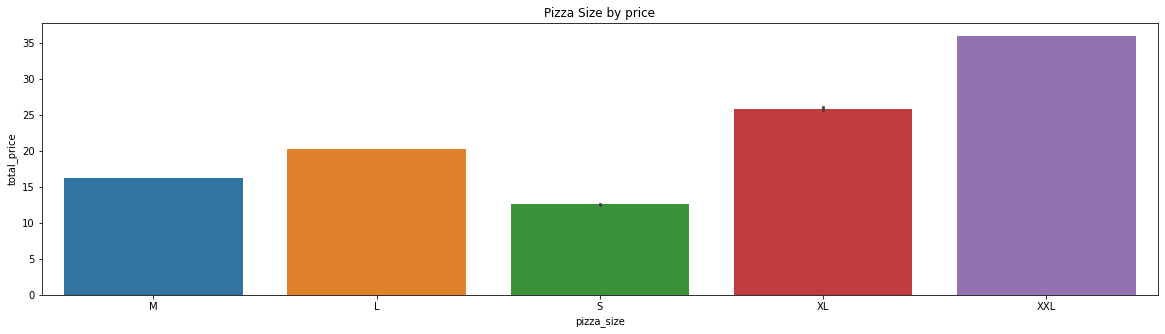

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(data=data,x="pizza_size",y="total_price")
plt.title("Pizza Size by price")